# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename) # YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>
1. I chose the adult census dataset.
2. I will be predicting the occupation an adult has. The label is "occupation".
3. This is a supervised multi-class classification problem.
4. The features are age, workclass, marital status, education, relationship, race, self sex identification, capital gain, capital loss, hours per week worked, native country, number of years in school, and binary income.
5. This is an important problem as a company could create value with targeted advertising based on a held occupation. Another example is that a company could hire someone based off of the prediction given that those features and the label align with a job. A third example is that an insurance company could assess risk when pricing policies by the job someone might have.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.dropna().equals(df)) # The DataFrame has null values.

False


In [4]:
df.shape

(32561, 15)

In [5]:
df.isna().sum() # age, workclass, occupation, hours-per-week, and native-country have missing data
# Workclass and occupation have similar values. What does this reveal about the data?
# Why does occupation have seven more null values than workclass?

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [6]:
# Here are the types of occupations and workclasses.
df['workclass'].value_counts() # Never-worked has seven values. Never-worked and Without-pay have low counts and might not be usable.

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [7]:
df['occupation'].value_counts() # Armed-Forces has a really low count and might not be usable.

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
df[df['occupation'].isna()] # I analyze the null occupation examples first as it is the label I want to predict.
# It seems that an example that cannot provide an occupation cannot provide a workclass.
# It also seems that some of these examples do have unreported jobs because of positive income binary, capital gain, and hours per week worked,
# so we cannot just mark them unemployed. An "unknown" category might throw off the data if examples have similar features to other occupations.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
27,54.0,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Non-Female,0,0,60.0,South,>50K
61,32.0,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Non-Female,0,0,40.0,NaN,<=50K
69,25.0,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K
77,67.0,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Non-Female,0,0,2.0,United-States,<=50K
106,17.0,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,14084,0,32.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35.0,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55.0,United-States,>50K
32531,30.0,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99.0,United-States,<=50K
32539,71.0,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Non-Female,0,0,10.0,United-States,>50K
32541,41.0,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32.0,United-States,<=50K


In [9]:
df[df['occupation'].isna() & ~df['workclass'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
5361,18.0,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K
10845,23.0,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Non-Female,0,0,35.0,United-States,<=50K
14772,17.0,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Non-Female,0,0,30.0,United-States,<=50K
20337,18.0,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,NaN,United-States,<=50K
23232,20.0,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Non-Female,0,0,40.0,United-States,<=50K
32304,30.0,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40.0,United-States,<=50K
32314,18.0,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Non-Female,0,0,4.0,United-States,<=50K


In [10]:
df[df['occupation'].isna() & ~df['workclass'].isna()].equals(df[df['workclass'] == 'Never-worked'])
 # The seven missing values are examples who have not worked before.

True

In [11]:
df[~df['occupation'].isna() & df['workclass'].isna()] # There are no null occupation examples with workclasses.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary


In [12]:
df[df['workclass'] == 'Without-pay'] # We check the 'Without-pay' category. This category has little data, and poses a risk for misclassification.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
1901,65.0,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50.0,United-States,<=50K
9257,19.0,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K
15533,21.0,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Non-Female,0,0,40.0,United-States,<=50K
15695,22.0,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Non-Female,4416,0,40.0,United-States,<=50K
16812,46.0,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25.0,United-States,<=50K
20073,65.0,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Non-Female,2414,0,20.0,United-States,<=50K
21944,52.0,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30.0,United-States,<=50K
22215,19.0,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Non-Female,0,0,10.0,United-States,<=50K
24596,62.0,Without-pay,170114,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,50.0,United-States,<=50K
25500,29.0,Without-pay,212588,Some-college,10,Married-civ-spouse,Farming-fishing,Own-child,White,Non-Female,0,0,65.0,United-States,<=50K


In [13]:
df[df['education'] == 'HS-grad']['workclass'].value_counts() # 'Without-pay' had largely HS-grad examples, however most 'HS-grad' examples
# work with pay. We remove examples with the 'Without-pay' feature.

Private             7780
Self-emp-not-inc     866
Local-gov            503
Self-emp-inc         279
State-gov            268
Federal-gov          263
Without-pay            9
Never-worked           1
Name: workclass, dtype: int64

In [14]:
# I will test removing examples with 'Without-pay' and 'Never-worked' workclass as they aren't significant enough to make accurate generalizations
# from. I now check the 'Armed-Forces' occupation class as it has low values.
df[df['occupation'] == 'Armed-Forces']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
442,24.0,Federal-gov,191073,HS-grad,9,Never-married,Armed-Forces,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K
1300,29.0,Federal-gov,301010,Some-college,10,Never-married,Armed-Forces,Not-in-family,Black,Non-Female,0,0,60.0,United-States,<=50K
14613,39.0,Federal-gov,227597,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Non-Female,0,0,50.0,United-States,<=50K
16111,24.0,Federal-gov,287988,Bachelors,13,Never-married,Armed-Forces,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
18034,34.0,Federal-gov,172716,12th,8,Married-civ-spouse,Armed-Forces,Husband,White,Non-Female,0,0,40.0,United-States,<=50K
18644,23.0,Federal-gov,163870,Some-college,10,Never-married,Armed-Forces,Other-relative,White,Non-Female,0,0,40.0,United-States,<=50K
18769,30.0,Federal-gov,76313,HS-grad,9,Married-civ-spouse,Armed-Forces,Other-relative,Amer-Indian-Inuit,Non-Female,0,0,48.0,United-States,<=50K
25799,46.0,Federal-gov,344415,Masters,14,Married-civ-spouse,Armed-Forces,Husband,White,Non-Female,0,1887,40.0,United-States,>50K
32316,23.0,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Non-Female,0,0,8.0,United-States,<=50K


In [15]:
# I will test removing examples with the 'Armed-Forces' workclass for performance or possibly adding them to 'Other-service'.
# age,hours-per-week, and native-country also have null values.
df[df['age'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
50,NaN,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40.0,United-States,<=50K
298,NaN,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K
433,NaN,Private,29662,Assoc-acdm,12,Married-civ-spouse,Other-service,Wife,White,Female,0,0,25.0,United-States,>50K
524,NaN,Private,177905,Some-college,10,Divorced,Machine-op-inspct,Unmarried,White,Non-Female,0,0,58.0,United-States,>50K
852,NaN,Self-emp-not-inc,177407,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31501,NaN,Private,259301,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40.0,United-States,<=50K
31617,NaN,Self-emp-not-inc,119793,HS-grad,9,Never-married,Other-service,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
31636,NaN,Private,58484,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
31913,NaN,NaN,90230,HS-grad,9,Never-married,NaN,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K


In [16]:
# I will test examples with no given age with a mean/median age and by removing them
df[df['hours-per-week'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
17,32.0,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Non-Female,0,0,NaN,United-States,<=50K
24,59.0,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,NaN,United-States,<=50K
96,48.0,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K
98,48.0,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K
119,22.0,Private,102632,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32133,52.0,Federal-gov,154521,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Non-Female,0,0,NaN,United-States,>50K
32164,35.0,Private,207066,Bachelors,13,Never-married,Sales,Not-in-family,White,Non-Female,10520,0,NaN,United-States,>50K
32193,68.0,Private,274096,10th,6,Divorced,Transport-moving,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K
32276,29.0,Local-gov,169544,Some-college,10,Never-married,Protective-serv,Own-child,White,Non-Female,0,0,NaN,United-States,<=50K


In [17]:
# I will resolve hours-per-week by a similar method as the one with age.
df[df['native-country'].isna()] # I could create an 'Unknown' country and test performance.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
14,40.0,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Non-Female,0,0,40.0,NaN,>50K
38,31.0,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,38.0,NaN,>50K
51,18.0,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30.0,NaN,<=50K
61,32.0,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Non-Female,0,0,40.0,NaN,<=50K
93,30.0,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35.0,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44.0,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.0,NaN,>50K
32469,58.0,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99.0,NaN,<=50K
32492,42.0,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Non-Female,0,0,50.0,NaN,<=50K
32510,39.0,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,45.0,NaN,>50K


In [18]:
# I will remove fnlwgt as each example is treated as an individual, and that number does not correlate with an individual.
# I will perform one-hot encoding on relationship, race, sex_selfID, marital-status, and education.
df['education'].value_counts() # I might lump 'Preschool' and '1st-4th' education examples together to create a category with more examples.
# I will test removing education-num as it mirrors education.

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [19]:
# I will have to test changing sample sizes and chosen sampels for training to not cause an imbalance of predictions based on self_sexID, race, age, nationality, things like that!

In [20]:
df.describe(include='all') # I will have to evaluate and scale capital-gain and capital-loss as most examples have 0.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [21]:
df['native-country'].value_counts() # 'United-States' might be over-represented, keep in mind.

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [23]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

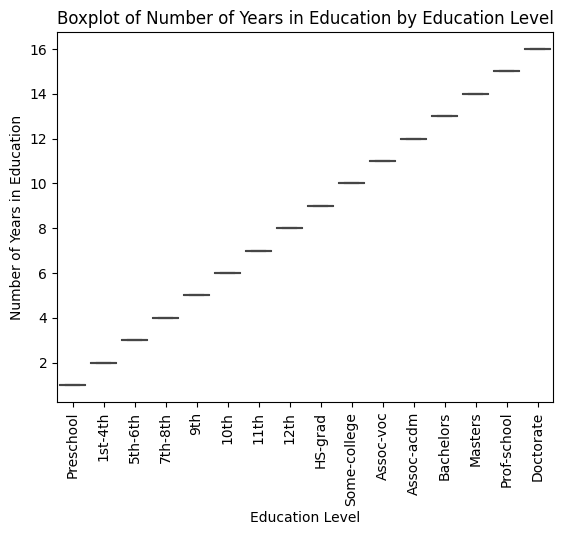

In [24]:
# I calculate the mean number of years in education by education level to easily order the education levels.
education_means = df.groupby(['education'])['education-num'].mean().sort_values(ascending=True)

sns.boxplot(x='education', y='education-num', data=df, order=education_means.index)
plt.xlabel('Education Level')
plt.ylabel('Number of Years in Education')
plt.title('Boxplot of Number of Years in Education by Education Level')
plt.xticks(rotation=90)
plt.show()
# As the boxplots look like lines, it is safe to say that as there is almost no variation in years in education to education level,
# and that the increase is highly linear, we may remove either feature to optimize the model.

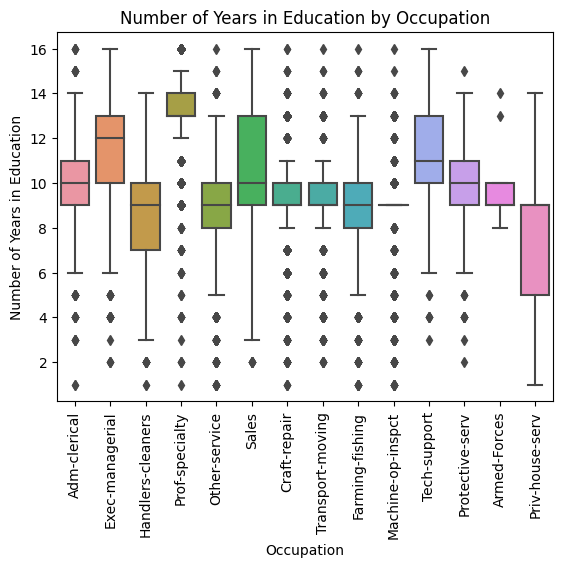

In [25]:
sns.boxplot(x='occupation', y='education-num', data=df)
plt.xlabel('Occupation')
plt.ylabel('Number of Years in Education')
plt.title('Number of Years in Education by Occupation')
plt.xticks(rotation=90)
plt.show()

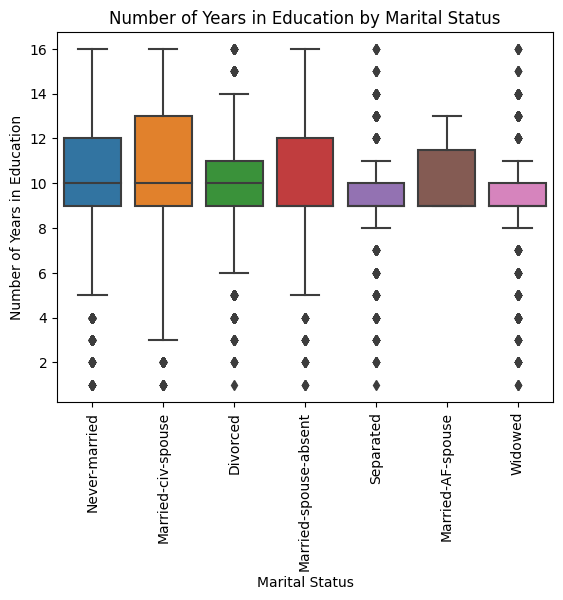

In [26]:
sns.boxplot(x='marital-status', y='education-num', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Number of Years in Education')
plt.title('Number of Years in Education by Marital Status')
plt.xticks(rotation=90)
plt.show()

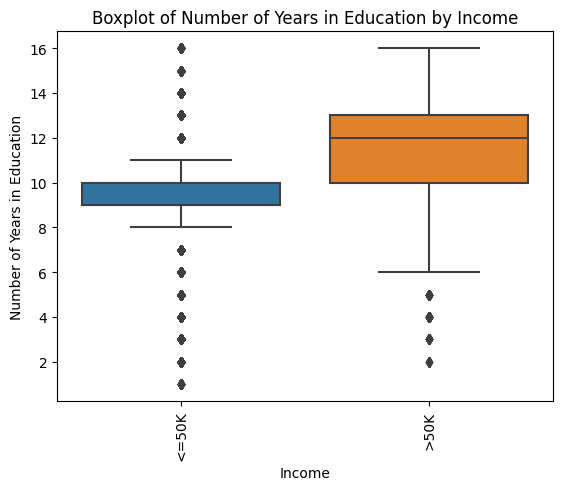

In [27]:
sns.boxplot(x='income_binary', y='education-num', data=df)
plt.xlabel('Income')
plt.ylabel('Number of Years in Education')
plt.title('Boxplot of Number of Years in Education by Income')
plt.xticks(rotation=90)
plt.show()

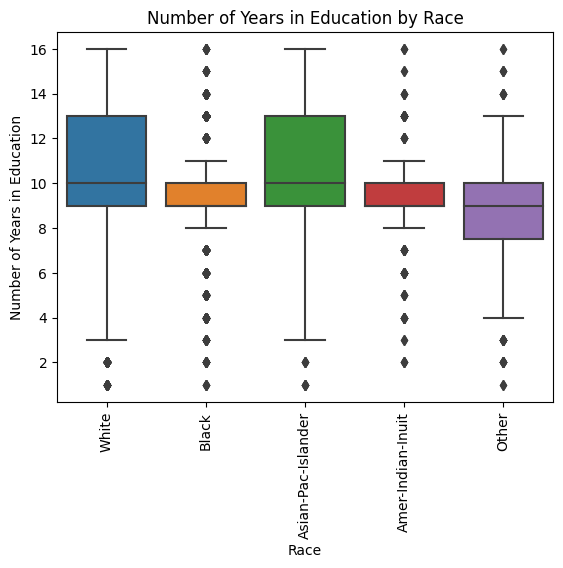

In [28]:
sns.boxplot(x='race', y='education-num', data=df)
plt.xlabel('Race')
plt.ylabel('Number of Years in Education')
plt.title('Number of Years in Education by Race')
plt.xticks(rotation=90)
plt.show()

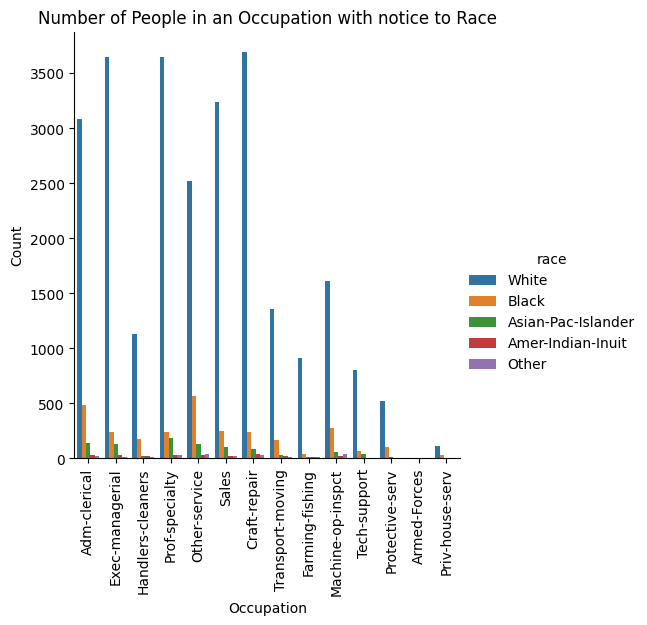

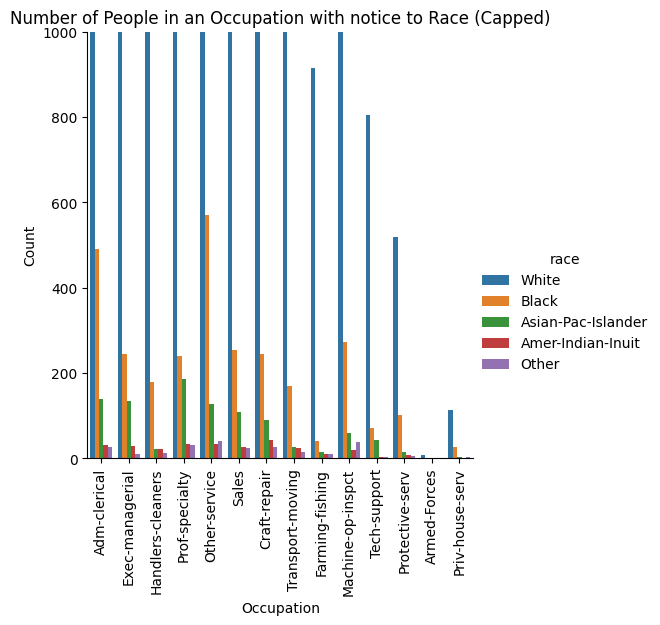

In [29]:
sns.catplot(x='occupation', kind='count', hue='race', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in an Occupation with notice to Race')
plt.xticks(rotation=90)
plt.show()

sns.catplot(x='occupation', kind='count', hue='race', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in an Occupation with notice to Race (Capped)')
plt.xticks(rotation=90)
plt.ylim(0, 1000)
plt.show()

# We will definitely need to scale these numbers.

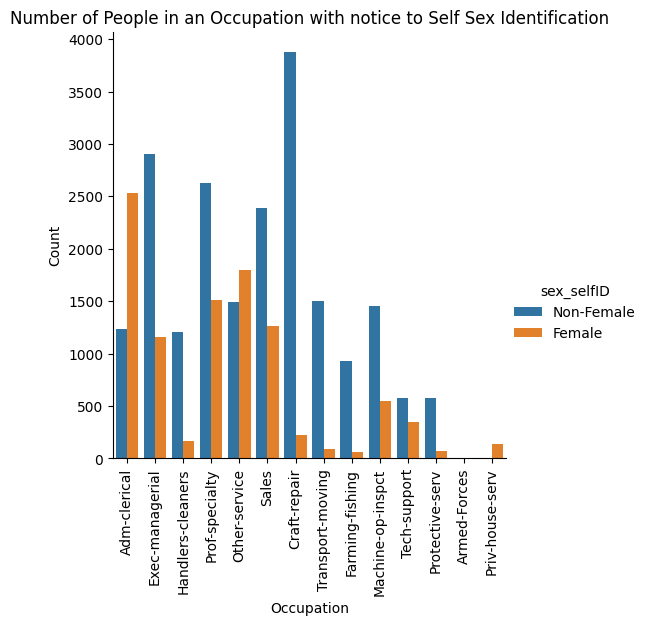

In [30]:
sns.catplot(x='occupation', kind='count', hue='sex_selfID', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in an Occupation with notice to Self Sex Identification')
plt.xticks(rotation=90)
plt.show()

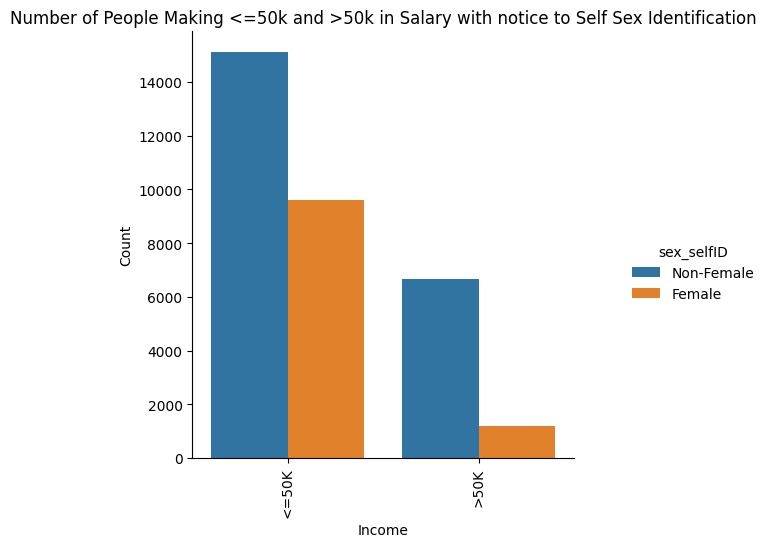

In [31]:
sns.catplot(x='income_binary', kind='count', hue='sex_selfID', data=df)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Number of People Making <=50k and >50k in Salary with notice to Self Sex Identification')
plt.xticks(rotation=90)
plt.show()

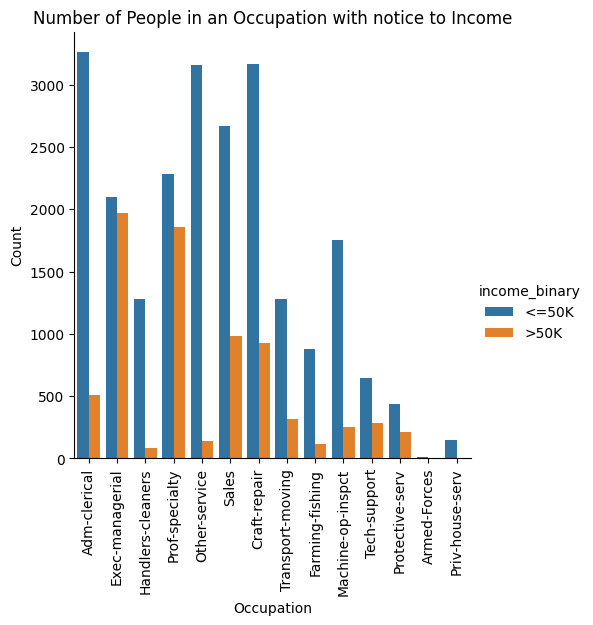

In [32]:
sns.catplot(x='occupation', kind='count', hue='income_binary', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in an Occupation with notice to Income')
plt.xticks(rotation=90)
plt.show()

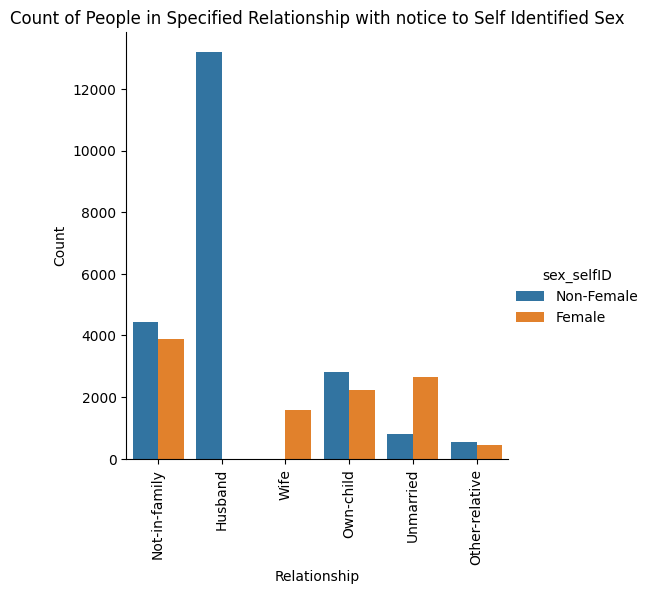

In [33]:
sns.catplot(x='relationship', kind='count', hue='sex_selfID', data=df)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Count of People in Specified Relationship with notice to Self Identified Sex')
plt.xticks(rotation=90)
plt.show()

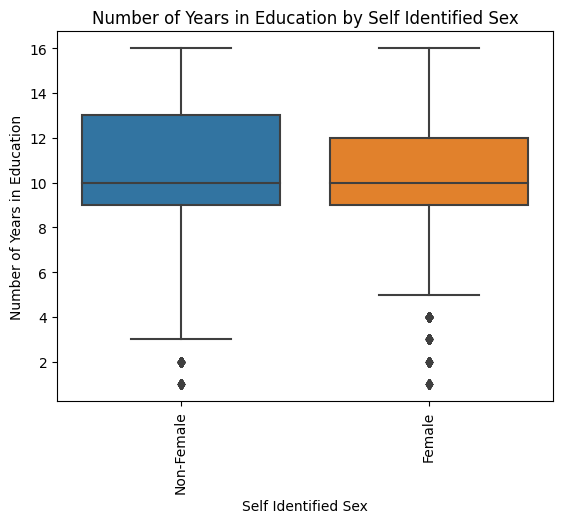

In [34]:
sns.boxplot(x='sex_selfID', y='education-num', data=df)
plt.xlabel('Self Identified Sex')
plt.ylabel('Number of Years in Education')
plt.title('Number of Years in Education by Self Identified Sex')
plt.xticks(rotation=90)
plt.show()

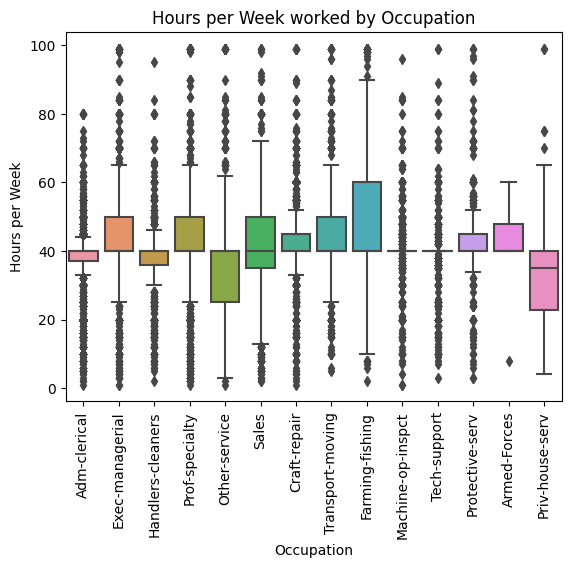

In [35]:
sns.boxplot(x='occupation', y='hours-per-week', data=df)
plt.xlabel('Occupation')
plt.ylabel('Hours per Week')
plt.title('Hours per Week worked by Occupation')
plt.xticks(rotation=90)
plt.show()

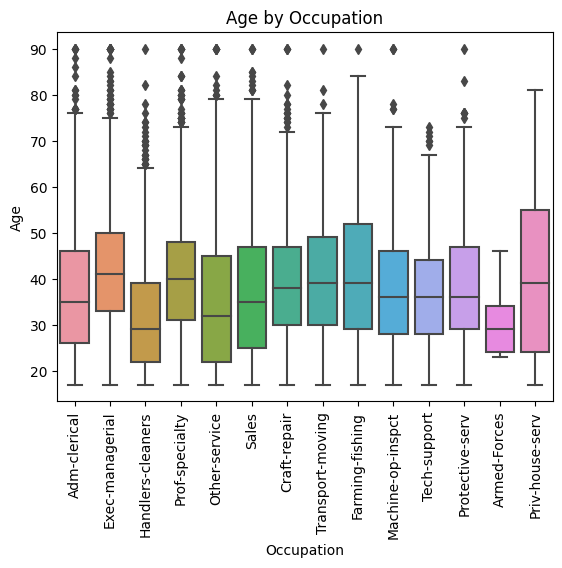

In [36]:
sns.boxplot(x='occupation', y='age', data=df)
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Age by Occupation')
plt.xticks(rotation=90)
plt.show()

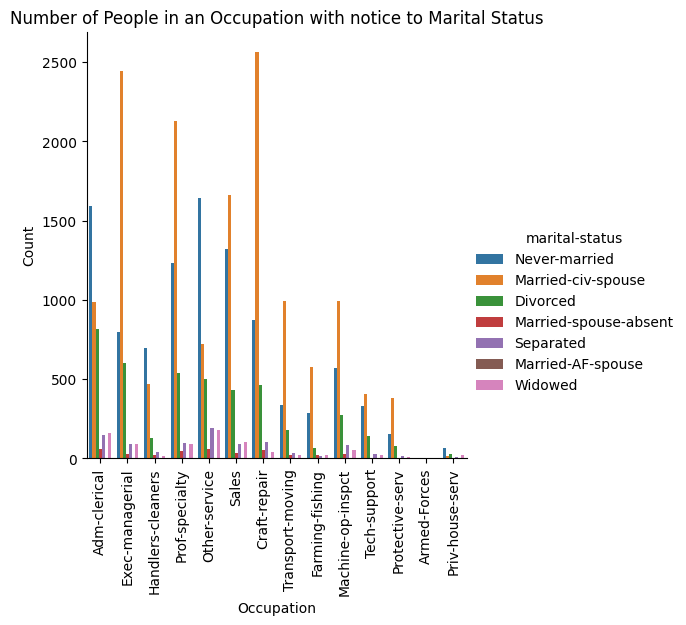

In [37]:
sns.catplot(x='occupation', kind='count', hue='marital-status', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in an Occupation with notice to Marital Status')
plt.xticks(rotation=90)
plt.show()

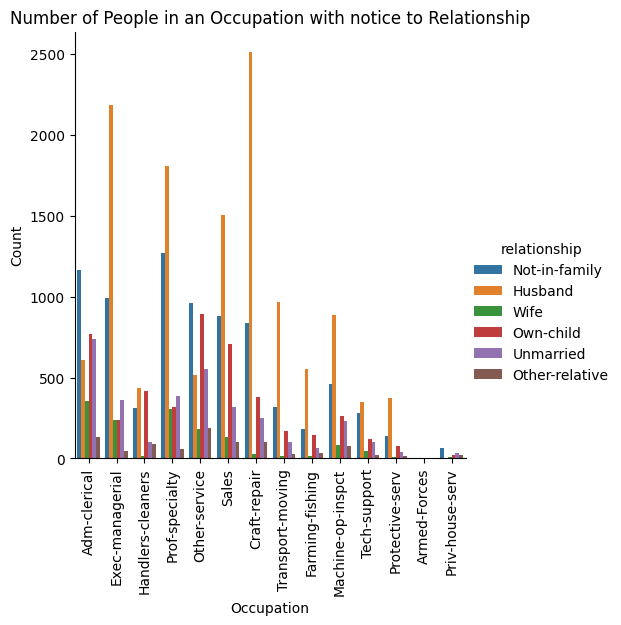

In [38]:
sns.catplot(x='occupation', kind='count', hue='relationship', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in an Occupation with notice to Relationship')
plt.xticks(rotation=90)
plt.show()

In [39]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


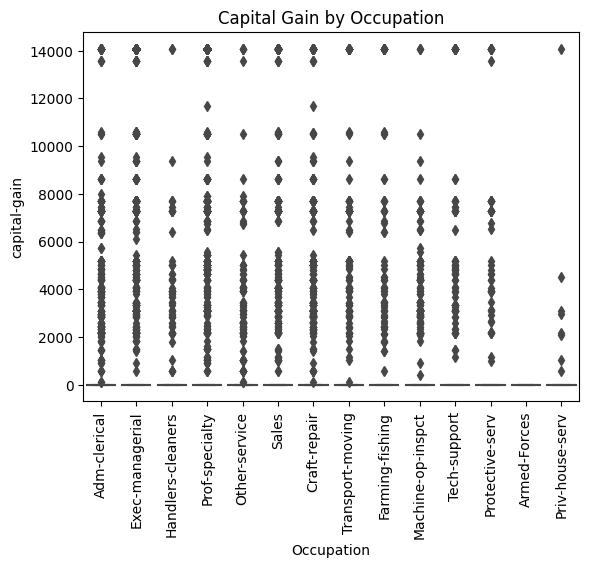

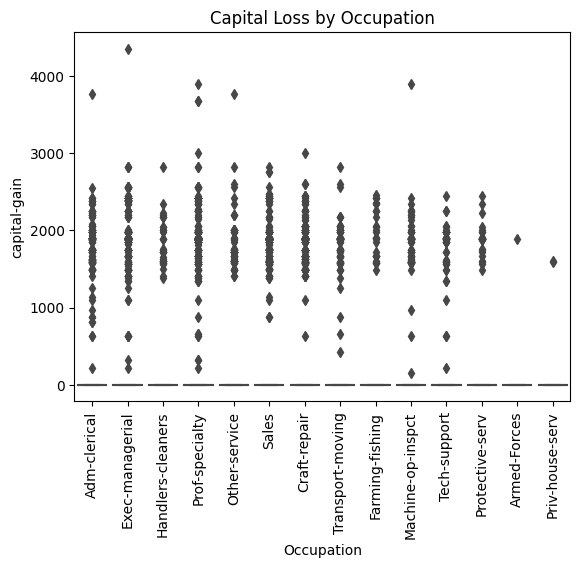

In [40]:
sns.boxplot(x='occupation', y='capital-gain', data=df)
plt.xlabel('Occupation')
plt.ylabel('capital-gain')
plt.title('Capital Gain by Occupation')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='occupation', y='capital-loss', data=df)
plt.xlabel('Occupation')
plt.ylabel('capital-gain')
plt.title('Capital Loss by Occupation')
plt.xticks(rotation=90)
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>
1. My new feature list is age, workclass, education, marital-status, relationship, race, sex_selfID, hours-per-week, native-country, and income-binary. I will need to test capital-gain and capital-loss, however they do not seem beneficial. fnlwgt is not relevant to the prediction, but can be tested, however there is likely no correlation. education-num is good for graphs, but it is redundant with education.
2. I will test merging low represented countries and low represented education groups, one-hot encoding education, marital-status, relationship, native-country, and workclass. I will convert sex_sekfID to a binary datatype. I will remove the extremely underepresented workclasses and occupancies, and fill in null values with means/medians or create new unknown groups.
3. I will test various ensemble methods and standalone models such as decision trees, k-nearest neighbors, stacking both, random forest, and gradient boosted decision trees. I could try a neural network however I suspect that it would be unnecessary
4. # FIXME

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [41]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [42]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [43]:
df.isna().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [44]:
# YOUR CODE HERE
# For the first processed variation of the dataset, null age values will be replaced with the median age.
# examples with workclass "Without-pay" and "Never-worked" will be removed.
# workclass will be one-hot encoded.
# fnlwgt will be removed.
# education will be one-hot encoded.
# education-num will be removed.
# marital-status "Married-AF-spouse" will be added to "Married-civ-spouse" and renamed to "Married".
# marital-status will be one-hot encoded.
# relationship will be one-hot encoded.
# race will be one-hot encoded.
# sex_selfID will be converted to a binary value.
# capital-gain and capital-loss will be scaled.
# native-countries that are not "United-States" will be set to "Other".
# native-country will be a binary value.

In [45]:
df_processed_0 = df.drop(columns='age')

In [46]:
df_processed_0['age'] = df['age'].fillna(df['age'].median())

In [47]:
df_processed_0.isna().sum() # null age values have been filled with the median age.

workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
age                  0
dtype: int64

In [48]:
df_processed_0['hours-per-week'] = df_processed_0['hours-per-week'].fillna(df_processed_0['hours-per-week'].median())

In [49]:
df_processed_0.isna().sum() # hours-per-week null values have been filled.

workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_binary        0
age                  0
dtype: int64

In [50]:
df_processed_0['native-country'] = df_processed_0['native-country'].apply(lambda x: x if x == 'United-States' else 'Other')

In [51]:
df_processed_0['native-country'].value_counts() # native-country will become a binary value.

United-States    29170
Other             3391
Name: native-country, dtype: int64

In [52]:
df_processed_0.head()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,50.0
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,38.0
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Other,<=50K,28.0


In [53]:
df_processed_0['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [54]:
df_processed_0['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [55]:
# I will remove "Without-pay", "Never-worked", and "Armed-Forces" as they have too little examples.
df_processed_0 = df_processed_0[df_processed_0['occupation'] != 'Armed-Forces']

In [56]:
df_processed_0 = df_processed_0[df_processed_0['workclass'] != 'Without-pay']
df_processed_0 = df_processed_0[df_processed_0['workclass'] != 'Never-worked']

In [57]:
df_processed_0.isna().sum()

workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1836
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income_binary        0
age                  0
dtype: int64

In [58]:
# I will now drop the unknown labels.
df_processed_0.dropna(inplace=True)

In [59]:
df_processed_0.isna().sum()

workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
age               0
dtype: int64

In [60]:
df_processed_0.shape

(30695, 15)

In [61]:
df_processed_0.head()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,50.0
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,38.0
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Other,<=50K,28.0


In [62]:
# I now remove fnlwgt and education-num
df_processed_0.drop(columns=['fnlwgt', 'education-num'], inplace=True)

In [63]:
df_processed_0.head()

,workclass,education,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,50.0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,38.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Other,<=50K,28.0


In [64]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'Dtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be e

In [65]:
df_processed_0 = pd.get_dummies(df_processed_0, prefix='workclass', columns=['workclass'])

In [66]:
df_processed_0.head() # I one-hot encode workclass.

,education,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov
0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0,0,0,0,0,0,1
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,50.0,0,0,0,0,1,0
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,38.0,0,0,1,0,0,0
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0,0,0,1,0,0,0
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Other,<=50K,28.0,0,0,1,0,0,0


In [67]:
df_processed_0 = pd.get_dummies(df_processed_0, prefix='education', columns=['education'])

In [68]:
df_processed_0.head() # I one-hot encode education.

,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,...,0,0,0,1,0,0,0,0,0,0
1,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,...,0,0,0,1,0,0,0,0,0,0
2,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0
3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,...,0,0,0,0,0,0,0,0,0,0
4,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Other,<=50K,...,0,0,0,1,0,0,0,0,0,0


In [69]:
df_processed_0['marital-status'].value_counts()

Married-civ-spouse       14328
Never-married             9902
Divorced                  4258
Separated                  959
Widowed                    839
Married-spouse-absent      388
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [70]:
# I combine "Married-spouse-absent" with "Married-AF-spouse" as too little examples.
df_processed_0['marital-status'] = df_processed_0['marital-status'].apply(lambda x: 'Married-spouse-absent' if x == 'Married-AF-spouse' else x)

In [71]:
df_processed_0['marital-status'].value_counts()

Married-civ-spouse       14328
Never-married             9902
Divorced                  4258
Separated                  959
Widowed                    839
Married-spouse-absent      409
Name: marital-status, dtype: int64

In [72]:
# I then one-hot encode marital-status
df_processed_0 = pd.get_dummies(df_processed_0, prefix='marital-status', columns=['marital-status'])

In [73]:
df_processed_0.head()

,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age,...,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0,...,0,0,0,0,0,0,0,1,0,0
1,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,50.0,...,0,0,0,0,0,1,0,0,0,0
2,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,38.0,...,0,0,0,0,1,0,0,0,0,0
3,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0,...,0,0,0,0,0,1,0,0,0,0
4,Prof-specialty,Wife,Black,Female,0,0,40.0,Other,<=50K,28.0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
# I one-hot encode occupation.
df_processed_0 = pd.get_dummies(df_processed_0, prefix='occupation', columns=['occupation'])
df_processed_0.head()

,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,50.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,38.0,0,...,0,1,0,0,0,0,0,0,0,0
3,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0,0,...,0,1,0,0,0,0,0,0,0,0
4,Wife,Black,Female,0,0,40.0,Other,<=50K,28.0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
df_processed_0['relationship'].value_counts()

Husband           12698
Not-in-family      7861
Own-child          4519
Unmarried          3269
Wife               1432
Other-relative      916
Name: relationship, dtype: int64

In [76]:
# I one-hot encode relationship.
df_processed_0 = pd.get_dummies(df_processed_0, prefix='relationship', columns=['relationship'])
df_processed_0.head()

,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age,workclass_Federal-gov,workclass_Local-gov,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,White,Non-Female,2174,0,40.0,United-States,<=50K,39.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,White,Non-Female,0,0,13.0,United-States,<=50K,50.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,White,Non-Female,0,0,40.0,United-States,<=50K,38.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Black,Non-Female,0,0,40.0,United-States,<=50K,53.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Black,Female,0,0,40.0,Other,<=50K,28.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df_processed_0['race'].value_counts()

White                 26282
Black                  2907
Asian-Pac-Islander      973
Amer-Indian-Inuit       285
Other                   248
Name: race, dtype: int64

In [78]:
# make native-country a binary classification
df_processed_0['native-country_united-states'] = df_processed_0['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

In [79]:
df_processed_0.drop(columns='native-country', inplace=True)
df_processed_0.head()

,race,sex_selfID,capital-gain,capital-loss,hours-per-week,income_binary,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_united-states
0,White,Non-Female,2174,0,40.0,<=50K,39.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,White,Non-Female,0,0,13.0,<=50K,50.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,White,Non-Female,0,0,40.0,<=50K,38.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,Black,Non-Female,0,0,40.0,<=50K,53.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,Black,Female,0,0,40.0,<=50K,28.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [80]:
# make income_binary a binary classification
df_processed_0['income-greater-50k'] = df_processed_0['income_binary'].apply(lambda x: 1 if x == '>50k' else 0)
df_processed_0.drop(columns='income_binary', inplace=True)
df_processed_0.head()

,race,sex_selfID,capital-gain,capital-loss,hours-per-week,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_united-states,income-greater-50k
0,White,Non-Female,2174,0,40.0,39.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,White,Non-Female,0,0,13.0,50.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,White,Non-Female,0,0,40.0,38.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,Black,Non-Female,0,0,40.0,53.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,Black,Female,0,0,40.0,28.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
# I scale capital-gain and capital-loss.
capital_gain_mean = df_processed_0['capital-gain'].mean()
capital_gain_std = df_processed_0['capital-gain'].std()
capital_loss_mean = df_processed_0['capital-loss'].mean()
capital_loss_std = df_processed_0['capital-loss'].std()
df_processed_0['capital-gain'] = (df_processed_0['capital-gain'] - capital_gain_mean) / capital_gain_std
df_processed_0['capital-loss'] = (df_processed_0['capital-loss'] - capital_loss_mean) / capital_loss_std

In [82]:
df_processed_0.head()

,race,sex_selfID,capital-gain,capital-loss,hours-per-week,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_united-states,income-greater-50k
0,White,Non-Female,0.628736,-0.21918,40.0,39.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,White,Non-Female,-0.257235,-0.21918,13.0,50.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,White,Non-Female,-0.257235,-0.21918,40.0,38.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,Black,Non-Female,-0.257235,-0.21918,40.0,53.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,Black,Female,-0.257235,-0.21918,40.0,28.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
df_processed_0.describe()

,capital-gain,capital-loss,hours-per-week,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_united-states,income-greater-50k
count,3.069500e+04,3.069500e+04,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,...,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.000000,30695.0
mean,-6.944545e-18,-4.652845e-17,40.955042,38.438997,0.030982,0.068187,0.739404,0.036358,0.082782,0.042287,...,0.030233,0.051995,0.413683,0.256100,0.029842,0.147223,0.106499,0.046653,0.895325,0.0
std,1.000000e+00,1.000000e+00,11.931539,13.087796,0.173272,0.252071,0.438967,0.187182,0.275557,0.201246,...,0.171230,0.222021,0.492501,0.436485,0.170154,0.354334,0.308481,0.210897,0.306139,0.0
min,-2.572350e-01,-2.191802e-01,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-2.572350e-01,-2.191802e-01,40.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,-2.572350e-01,-2.191802e-01,40.000000,37.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,-2.572350e-01,-2.191802e-01,45.000000,47.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,5.482420e+00,1.051855e+01,99.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [84]:
# I binary classify sex self identification
df_processed_0['selfID_female'] = df_processed_0['sex_selfID'].apply(lambda x : 1 if x == 'Female' else 0)
df_processed_0.drop(columns='sex_selfID', inplace=True)
df_processed_0.head()

,race,capital-gain,capital-loss,hours-per-week,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_united-states,income-greater-50k,selfID_female
0,White,0.628736,-0.21918,40.0,39.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,White,-0.257235,-0.21918,13.0,50.0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,White,-0.257235,-0.21918,40.0,38.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,Black,-0.257235,-0.21918,40.0,53.0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,Black,-0.257235,-0.21918,40.0,28.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [85]:
# I one-hot encode race.
df_processed_0 = pd.get_dummies(df_processed_0, prefix='race', columns=['race'])
df_processed_0.head()

,capital-gain,capital-loss,hours-per-week,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Unmarried,relationship_Wife,native-country_united-states,income-greater-50k,selfID_female,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.628736,-0.21918,40.0,39.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,-0.257235,-0.21918,13.0,50.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.257235,-0.21918,40.0,38.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.257235,-0.21918,40.0,53.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,-0.257235,-0.21918,40.0,28.0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [86]:
df_processed_0.dtypes

capital-gain                            float64
capital-loss                            float64
hours-per-week                          float64
age                                     float64
workclass_Federal-gov                     uint8
workclass_Local-gov                       uint8
workclass_Private                         uint8
workclass_Self-emp-inc                    uint8
workclass_Self-emp-not-inc                uint8
workclass_State-gov                       uint8
education_10th                            uint8
education_11th                            uint8
education_12th                            uint8
education_1st-4th                         uint8
education_5th-6th                         uint8
education_7th-8th                         uint8
education_9th                             uint8
education_Assoc-acdm                      uint8
education_Assoc-voc                       uint8
education_Bachelors                       uint8
education_Doctorate                     

In [88]:
# I now have my processed data set. I now split it!


(18300, 59) (7982, 59) (2470, 59) (1943, 59)
